In [9]:
import pandas as pd
import seaborn as sns

In [71]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Пропущенные значения заменены знаком вопроса

# Исследуем числовые данные

In [30]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [31]:
df['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
87        1
82        1
69        1
Name: hours-per-week, Length: 96, dtype: int64

In [36]:
df[df['hours-per-week'] > 40].income.value_counts()

<=50K    8610
>50K     5742
Name: income, dtype: int64

In [40]:
df[df['hours-per-week'] <= 40].income.value_counts()

<=50K    28545
>50K      5945
Name: income, dtype: int64

In [60]:
# Деление данных на числовые и категориальные
df_num = df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
df_cat = df.drop(columns=['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

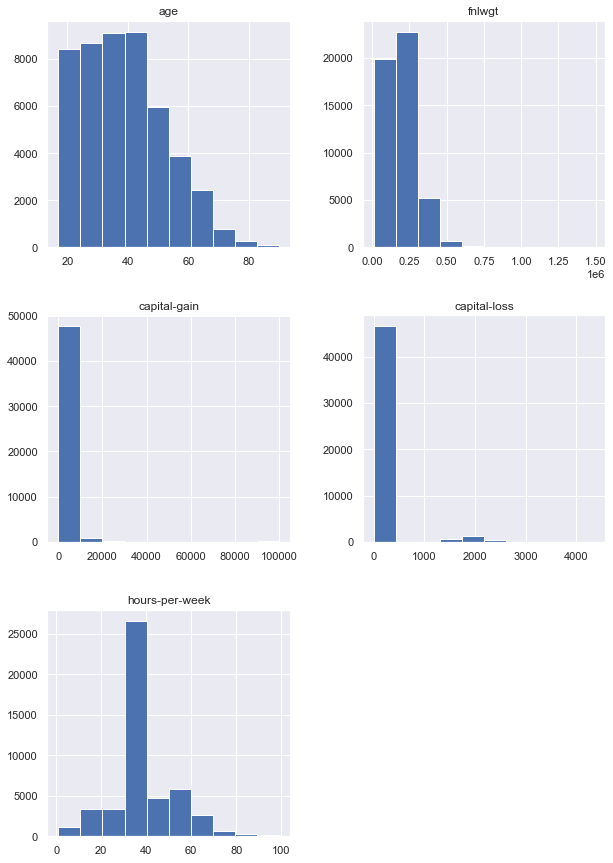

In [61]:
sns.set(rc = {'figure.figsize': (10, 15)})

df_num.hist()

In [62]:
df_num.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.003706,-0.004366,-0.013519
capital-gain,0.077229,-0.003706,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.082157,0.054467,1.000000


In [63]:
from sklearn.preprocessing import StandardScaler

num_colums = df_num.columns

scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

df_num = pd.DataFrame(df_num, columns=num_colums)
df_num.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,-0.995129,0.351675,-0.144804,-0.217127,-0.034087
1,-0.046942,-0.945524,-0.144804,-0.217127,0.772930
2,-0.776316,1.394723,-0.144804,-0.217127,-0.034087
3,0.390683,-0.277844,0.886874,-0.217127,-0.034087
4,-1.505691,-0.815954,-0.144804,-0.217127,-0.841104


# Категориальные переменные

In [64]:
from sklearn.preprocessing import LabelEncoder

for col in df_cat.columns:
    
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

df_cat.head()

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country
0,4,1,6,4,7,3,2,1,39
1,4,11,8,2,5,0,4,1,39
2,2,7,11,2,11,0,4,1,39
3,4,15,9,2,7,0,2,1,39
4,0,15,9,4,0,3,4,0,39


Объединение датасетов

In [70]:
X = pd.concat([df_cat, df_num], axis = 1)

Целевая переменная

In [72]:
le = LabelEncoder()
y = le.fit_transform(df.income)

# Обучение

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)

## Логистическая регрессия

In [75]:
logist = LogisticRegression(max_iter=1000)
logist.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [78]:
print('Train score: {:.2%}'.format(logist.score(x_train, y_train)))
print('Test score: {:.2%}'.format(logist.score(x_test, y_test)))

Train score: 82.54%
Test score: 82.18%


## SVM

In [80]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [81]:
print('Train score: {:.2%}'.format(svm.score(x_train, y_train)))
print('Test score: {:.2%}'.format(svm.score(x_test, y_test)))

Train score: 81.84%
Test score: 81.69%


# Вывод

Логистическая регрессия оказалась точнее и быстрее по обучению.

### Вопросы:

1) Есть ли смысл делить признак 'hours-per-week' на 2 класса?

2) Как можно ли улучшить score в этой задаче?